# 2. cvxpy

## contents
- [2.1 Linear Programming](#2.1-Linear-Programming)
    - [Example 1](#Example-1:-Constrained-Production)
    - [Example 2](#Example-2:-Utility-from-Substitutes)
    - [Example 3](#Example-3:-Integer-Linear-Programming)
    - [Example 4](#Example-4:-Linear-Rregression)
    - [Example 5](#Example-5:-Integer-LP-in-More-Compact-Form)
- [2.2 Nonlinear Programming](#2.2-Convex-Optimization)
    - [Example 1](#Example-1)
    - [Example 2](#Example-2)
    - [Example 3](#Example-3)
- [2.3 Other Issues (Optional)](#2.3-Other-Issues)

## 2.1 Linear Programming

In [1]:
import cvxpy as cp
import numpy as np
import scipy as sp
import cvxopt
import cylp
# import naginterfaces
import matplotlib.pyplot as plt

# import sdpt3glue
# import sdpt3glue.solve as slv
# ModuleNotFoundError: No module named 'solve'
# seems cannot use sdpt3

from pyscipopt import Model

from warnings import filterwarnings

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

For obvious reason, we apply this package to the same examples as in scipy.optimize.

But before that, we want to introduce what problems can be solved by this package. The **DCP (Disciplined Convex Programming)** rules must be satisfied, which is as follows:

- Objective must have one of the following two forms:
  - Minimize(convex)
  - Maximize(concave)
 
- Constraints must have one of the following three forms:
  - affine == affine
  - convex <= concave
  - concave >= convex
  
If you don't know how to judge the above, or just be lazy to do so, then you are lucky, because `cvxpy` can do for you with the method `prob.is_dcp()` where by `prob` I mean the optimization problem we construct.

![jupyter](./cvxpy_status.jpg)

### Example 1: Constrained Production

$$
\begin{aligned}
\max_{X,Y} \quad & Z = 2X + Y \\
\text{s.t.} \quad & 4X + Y \leq 400 \\
& X + Y \leq 300 \\
& 2X + 5Y \leq 200
\end{aligned}
$$

In [2]:
# create optimization variables
x1 = cp.Variable()
y1 = cp.Variable()

# create constraints
cons1 = [4*x1 +   y1 <= 400,
          x1 +   y1 <= 300,
        2*x1 + 5*y1 <= 200,
          x1 >= 0,         # slightly different with these two non-negativity constraints
          y1 >= 0]

# create objective
obj1 = cp.Maximize(2*x1 + y1)

# form and solve optimization problems
prob1 = cp.Problem(obj1, cons1)
%timeit prob1.solve()  # Returns the optimal value.

print("DCP:", prob1.is_dcp())
print("status:", prob1.status)
print("optimal value", prob1.value)
print("optimal var", x1.value, y1.value)

28.6 ms ± 5.73 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
DCP: True
status: optimal
optimal value 199.99999999495162
optimal var 99.99999999747027 1.10708271867546e-11


It seems this package runs with similar time as the revised simplex method, but not that accuracy.

We can **choose a built-in solver** among ['ECOS', 'OSQP', 'SCS'].

In [3]:
%timeit prob1.solve(solver=cp.ECOS)  # by default

print("DCP:", prob1.is_dcp())
print("status:", prob1.status)
print("optimal value", prob1.value)
print("optimal var", x1.value, y1.value)

2.97 ms ± 147 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
DCP: True
status: optimal
optimal value 199.99999983941774
optimal var 99.99999987967911 8.005952551603999e-08


In [4]:
%timeit prob1.solve(solver=cp.OSQP)  

print("DCP:", prob1.is_dcp())
print("status:", prob1.status)
print("optimal value", prob1.value)
print("optimal var", x1.value, y1.value)

3.81 ms ± 419 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
DCP: True
status: optimal
optimal value 200.00000000000003
optimal var 100.0 3.828768110634485e-14


In [5]:
%timeit prob1.solve(solver=cp.SCS)  

print("DCP:", prob1.is_dcp())
print("status:", prob1.status)
print("optimal value", prob1.value)
print("optimal var", x1.value, y1.value)

2.6 ms ± 74.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
DCP: True
status: optimal
optimal value 200.00000000000006
optimal var 100.00000000000004 -2.4310966140281386e-14


In [6]:
# installed_solvers()
# NameError: name 'installed_solvers' is not defined

print(cp.installed_solvers())

['CBC', 'CPLEX', 'CVXOPT', 'ECOS', 'GLPK', 'GLPK_MI', 'GUROBI', 'MOSEK', 'OSQP', 'SCIP', 'SCS']


![jupyter](./cvxpy_solver.jpg)

In [7]:
# https://www.cvxpy.org/install/#install-with-cvxopt-and-glpk-support
# https://www.cvxpy.org/install/#install-with-gurobi-support
# https://www.cvxpy.org/install/#install-with-mosek-support
# https://www.cvxpy.org/install/#install-with-xpress-support
# https://www.cvxpy.org/install/#install-with-cbc-clp-cgl-support
# https://www.cvxpy.org/install/#install-with-cplex-support
# https://www.cvxpy.org/install/#install-with-sdpt3-support
# https://www.cvxpy.org/install/#install-with-nag-support
# https://www.cvxpy.org/install/#install-with-scip-support

In [8]:
%timeit prob1.solve(solver=cp.CVXOPT)  

print("DCP:", prob1.is_dcp())
print("status:", prob1.status)
print("optimal value", prob1.value)
print("optimal var", x1.value, y1.value)

13.9 ms ± 890 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
DCP: True
status: optimal
optimal value 199.99999994980018
optimal var 99.99999996894064 1.1918898707241887e-08


In [9]:
# Solve with GLPK.
# install instruction: 
#      https://www.cnblogs.com/Arbor/p/6506404.html 
#      https://blog.csdn.net/belldeep/article/details/7882124
prob1.solve(solver=cp.GLPK)
print("optimal value with GLPK:", prob1.value)
print("optimal var with GLPK", x1.value, y1.value)
# related to numpy + mkl
# quite precise

optimal value with GLPK: 200.0
optimal var with GLPK 100.0 0.0


In [10]:
# Solve with GLPK_MI.
prob1.solve(solver=cp.GLPK_MI)
print("optimal value with GLPK_MI:", prob1.value)
print("optimal var with GLPK_MI", x1.value, y1.value)
# related to numpy + mkl

optimal value with GLPK_MI: 200.0
optimal var with GLPK_MI 100.0 -0.0


In [11]:
# Solve with GUROBI.
# install instruction:
#   https://www.cnblogs.com/hongliyu/p/10220098.html
#   https://blog.csdn.net/WASEFADG/article/details/90344256
#   can acquire academic licence
prob1.solve(solver=cp.GUROBI)
print("optimal value with GUROBI:", prob1.value)
print("optimal var with GUROBI", x1.value, y1.value)

Using license file C:\Users\HKH\gurobi.lic
Academic license - for non-commercial use only
optimal value with GUROBI: 200.0
optimal var with GUROBI 100.0 0.0


In [12]:
# Solve with MOSEK.
#    https://docs.mosek.com/9.2/install/installation.html
#    can acquire academic licence
prob1.solve(solver=cp.MOSEK)
print("optimal value with MOSEK:", prob1.value)
print("optimal var with MOSEK", x1.value, y1.value)
# not that precise

# Error: rescode.err_missing_license_file(1008): License cannot be located. The default search path is ';C:\Users\HKH\mosek\mosek.lic;'.
# if there is no this directory - C:\Users\HKH\mosek\ - just create it and put the lic file there

optimal value with MOSEK: 199.99999999495162
optimal var with MOSEK 99.99999999747027 1.10708271867546e-11


In [13]:
# Solve with Elemental.
# prob1.solve(solver=cp.ELEMENTAL)
# print("optimal value with Elemental:", prob1.value)
# print("optimal var with Elemental", x1.value, y1.value)

# AttributeError: module 'cvxpy' has no attribute 'ELEMENTAL'
# no longer have this solver

In [14]:
# Solve with CBC.
# pip install cylp
# import cylp
prob1.solve(solver=cp.CBC)
print("optimal value with CBC:", prob1.value)
print("optimal var with CBC", x1.value, y1.value)

optimal value with CBC: 200.0
optimal var with CBC 100.0 -0.0


In [15]:
# Solve with CPLEX.
# pip install cplex
prob1.solve(solver=cp.CPLEX)
print ("optimal value with CPLEX:", prob1.value)
print("optimal var with CPLEX", x1.value, y1.value)

optimal value with CPLEX: 200.0
optimal var with CPLEX 100.0 0.0


In [16]:
# Solve with NAG.
#     https://www.nag.co.uk/numeric/py/nagdoc_latest/readme.html#installation
#     need to request for licence

# prob1.solve(solver=cp.NAG)
# print ("optimal value with NAG:", prob1.value)
# print("optimal var with NAG", x1.value, y1.value)

In [17]:
# Solve with SCIP.
# prob1.solve(solver=cp.SCIP)
# print ("optimal value with SCIP:", prob1.value)
# print("optimal var with SCIP", x1.value, y1.value)
#  AttributeError: module 'cvxpy' has no attribute 'SCIP'

In [18]:
# Solve with SCIP.
prob1.solve(solver='SCIP')
print ("optimal value with SCIP:", prob1.value)
print("optimal var with SCIP", x1.value, y1.value)

# SolverError: The solver SCIP is not installed.
# download the latest cvxpy from github
# https://github.com/cvxgrp/cvxpy

optimal value with SCIP: 200.0
optimal var with SCIP 100.0 0.0


In [19]:
# https://github.com/SCIP-Interfaces/PySCIPOpt/blob/master/INSTALL.md
# https://www.cnblogs.com/dengfaheng/p/10041488.html

In [20]:
# Solve with SCIP.
# from pyscipopt import Model

model = Model("Example")
x = model.addVar("x")
y = model.addVar("y")
model.setObjective(-2*x - y)
model.addCons(4*x + y <= 400)
model.addCons(x + y <= 300)
model.addCons(2*x + 5*y <= 200)
model.optimize()
sol = model.getBestSol()
print("x: {}".format(sol[x]))
print("y: {}".format(sol[y]))
print("LP solution status: ",model.getLPSolstat())
print("LP solution value: ",-model.getLPObjVal())
# can use tap completion check attributes of model

x: 100.0
y: 0.0
LP solution status:  0
LP solution value:  200.0


In [21]:
x1.domain, x1.name(), y1.domain, y1.name()

([], 'var0', [], 'var1')

Why the domains of x and y are not bounded?

In [22]:
obj1.value

200.0

In [23]:
# obj.curvature
# AttributeError: 'Maximize' object has no attribute 'curvature'

In [24]:
# obj.sign
# AttributeError: 'Maximize' object has no attribute 'sign'

In [25]:
# obj.grad
# AttributeError: 'Maximize' object has no attribute 'grad'

### Example 2: Utility from Substitutes

$$
\begin{aligned}
\max_{X,Y} \quad & Z = X + Y  \\
\text{s.t.} \quad & 2X + 3Y \leq 40 \\
& X - Y \geq 5 \\
\end{aligned}
$$

In [26]:
# create optimization variables
x2 = cp.Variable()
y2 = cp.Variable()

# create constraints
cons2 = [2*x2 + 3*y2 <= 40,
          x2 -   y2 >= 5,
          x2 >= 0,         # slightly different with these two non-negativity constraints
          y2 >= 0]

# create objective
obj2 = cp.Maximize(x2 + y2)

# form and solve optimization problems
prob2 = cp.Problem(obj2, cons2)
%timeit prob2.solve()  # Returns the optimal value.

print("DCP:", prob2.is_dcp())
print("status:", prob2.status)
print("optimal value", prob2.value)
print("optimal var", x2.value, y2.value)

26.1 ms ± 3.43 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
DCP: True
status: optimal
optimal value 20.0
optimal var 20.0 -0.0


It's **weird** since it doesn't satisfy the constraint or more precisely, the bound that $y \geq 0$. However, since we are dealing with floating point numbers, so it's normal to expect some oscillations around $0$.

In [27]:
x2.domain, x2.name(), obj2.value

([], 'var525', 20.0)

### Example 3: Integer Linear Programming

We can solve a integer LP simply by letting the `integer` options in `cp.Variable` to be `True` (just as easy as letting the `nonneg` option in `cp.Parameter` to be `True`.)

In [28]:
# create optimization variables
x2 = cp.Variable(integer=True)
y2 = cp.Variable(integer=True)

# create constraints
cons2 = [2*x2 + 3*y2 <= 40,
          x2 -   y2 >= 5,
          x2 >= 0,         # slightly different with these two non-negativity constraints
          y2 >= 0]

# create objective
obj2 = cp.Maximize(x2 + y2)

# form and solve optimization problems
prob2 = cp.Problem(obj2, cons2)
%timeit prob2.solve()  # Returns the optimal value.

print("DCP:", prob2.is_dcp())
print("status:", prob2.status)
print("optimal value", prob2.value)
print("optimal var", x2.value, y2.value)

26.5 ms ± 4.73 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
DCP: True
status: optimal
optimal value 20.0
optimal var 20.0 0.0


### Example 4: Linear Rregression

$$\min_{\beta} \quad (y-\mathbb{X}\beta)^{T}(y-\mathbb{X}\beta)$$

In [29]:
var_b = cp.Variable((2,1))

np.random.seed(1)
X = np.random.randn(100,2)
Y = X @ np.array([[2],[1]]) + np.random.randn(100,1)

$$\beta = (\mathbb{X}^T\mathbb{X})^{-1}\mathbb{X}^Ty$$

In [30]:
# solve b using linear algebra

b = np.linalg.solve(X.T @ X, X.T @ Y)
print(b)

[[2.06198497]
 [0.89626717]]


In [31]:
# solve b using cvxpy

objR = cp.Minimize(cp.sum_squares(Y - X @ var_b))
probR = cp.Problem(objR)
probR.solve()
var_b.value

array([[2.06198497],
       [0.89626717]])

### Example 5: Integer LP in More Compact Form

This example is obtained from [here](https://blog.csdn.net/A_thermal/article/details/104485823). The original problem is as follows:

$$
\begin{aligned}
\text{Objective: }& & \min_{\lbrace x_i \rbrace_{i=1}^{5}}\sum_{i=1}^{5} x_i \\
\text{s.t. } \\
& \text{C1: }& 0 \leq x_1 \leq 25 \\
& \text{C2: }& 0 \leq x_2 \leq 12 \\
& \text{C3: }& 0 \leq x_3 \leq 12.5 \\
& \text{C4: }& 0 \leq x_4 \leq 2 \\
& \text{C5: }& 0 \leq x_5 \leq 0 \\
& \text{C6: }& x_1 \leq 10 \\
& \text{C7: }& x_2 \leq 40 \\
& \text{C8: }& x_3 \leq 90 \\
& \text{C9: }& x_4 \leq 80 \\
& \text{C10: }& x_5 \leq 0 \\
& \text{C11: }& -1 · x_1 \leq 40 \\
& \text{C12: }& -0.9 · x_1 - x_2 \leq 2 \\
& \text{C13: }& -0.8 · x_1 - (5/6) · x_2 - x_3 \leq -30 \\
& \text{C14: }& -0.3 · x_1 - (5/8) · x_2 - 0.8 · x_3 - x_4 \leq 38 \\
\end{aligned}
$$

In [32]:
# source code from: https://blog.csdn.net/A_thermal/article/details/104485823

n = 5
x = cp.Variable(n, integer=True)

A1 = np.ones((5,5))
for i in range(A1.shape[0]):
    for j in range(A1.shape[1]):
        if i == j:
            pass
        else:
            A1[i,j] = A1[i,j]*0
A2 = A1 * (-1)
A3 = np.array([[-1,0,0,0,0],[-0.9,-1,0,0,0],[-0.8,-(40/48),-1,0,0],[-0.3,-(5/8),-0.8,-1,0]])
B = np.array([0,0,0,0,0,25,12,12.5,2,0,10,40,90,80,0,40,2,-30,32])
A = np.vstack((A2,A1,A1,A3))
constraints = [A @ x <= B]

objects = cp.Minimize(cp.sum(x))

probC = cp.Problem(objects,constraints)
probC.solve(solver=cp.CPLEX)

print("The optimal value is", probC.value)
print("A solution x is")
print(x.value)

The optimal value is 34.0
A solution x is
[10. 12. 12. -0. -0.]


**Conclusion**: It seems _cvxpy_ is not that good in dealing with linear programming problem at the first sight, compared to *linprog*. But it's up to which solver we choose. More general, we have much more options in _cvxpy_.

## 2.2 Convex Optimization

### Example 1

$$
\begin{aligned}
\max_{K,L} \quad & K^\frac{1}{3}L^\frac{2}{3}\\
\text{s.t.} \quad & 4K + 5L \leq 100
\end{aligned}
$$

In [33]:
k = cp.Variable()
l = cp.Variable()

nlcons1 = [4 * k + 5 * l <= 100,
             k >= 0,         
             l >= 0]

nlobj1 = cp.Maximize(k ** (1/3) * l ** (2/3))

nlprob1 = cp.Problem(nlobj1, nlcons1)
# nlprob1.solve()  

print("DCP:", nlprob1.is_dcp())
# print("status:", nlprob1.status)
# print("optimal value", nlprob1.value)
# print("optimal var", k.value, l.value)

DCP: False


### Example 2

$$
\begin{aligned}
\min_{x,y} \quad & PPF = x^2 + y^2 \\
\text{s.t.} \quad & U = x^\frac{1}{3}y^\frac{2}{3} \geq 10
\end{aligned}
$$

In [34]:
x = cp.Variable()
y = cp.Variable()

nlcons2 = [x ** (1/3) * y ** (2/3) >= 10,
             x >= 0,         
             y >= 0]

nlobj2 = cp.Maximize(x ** 2 + y ** 2)

nlprob2 = cp.Problem(nlobj2, nlcons2)

print("DCP:", nlprob2.is_dcp(),'\n')

try:
    nlprob2.solve()
except Exception as e:
    print(e)

DCP: False 

Problem does not follow DCP rules. Specifically:
The objective is not DCP, even though each sub-expression is.
You are trying to maximize a function that is convex.


### Example 3

$$
\begin{aligned}
\max_{x,y}\quad & -(x-20)^2 - 2(y-1)^2 \\
\text{s.t.}: \quad & x + 2y \leq 50
\end{aligned}
$$

In [35]:
x = cp.Variable()
y = cp.Variable()

nlcons3 = [x + 2*y <= 50,
             x >= 0,         
             y >= 0]

nlobj3 = cp.Maximize(-(x-20)**2 - 2*(y-1)**2)

nlprob3 = cp.Problem(nlobj3, nlcons3)
nlprob3.solve()  

print("DCP:", nlprob3.is_dcp())
print("status:", nlprob3.status)
print("optimal value", nlprob3.value)
print("optimal var", x.value, y.value)

DCP: True
status: optimal
optimal value -1.2990296595053677e-44
optimal var 20.0 1.0000000000000002


## 2.3 Other Issues

### 1. Parameters

> "Parameters are symbolic representations of constants. The purpose of parameters is to change the value of a constant in a problem without reconstructing the entire problem. In many cases, solving a parametrized program multiple times can be substantially faster than repeatedly solving a new problem: after reading this section, be sure to read the tutorial on [Disciplined Parametrized Programming (DPP)](https://www.cvxpy.org/tutorial/advanced/index.html#dpp).
$\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad$ 
$\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad$—— CVXPY Tutorial

Generally, we can create **parameters** and specify some properties and assign concrete values if necessary.

In [36]:
# Positive scalar parameter.
m = cp.Parameter(nonneg=True)

# Column vector parameter with unknown sign (by default).
c = cp.Parameter(5)

# Matrix parameter with negative entries.
G = cp.Parameter((4, 7), nonpos=True)

# Assigns a constant value to G.
G.value = -np.ones((4, 7))

In [37]:
# Create parameter, then assign value.
rho1 = cp.Parameter(nonneg=True)
rho1.value = 2

# Initialize parameter with a value.
rho2 = cp.Parameter(nonneg=True, value=2)

print(rho1.value,rho2.value)

2 2


Computing trade-off curves is a common use of parameters. The example below computes a trade-off curve for a LASSO problem.

gamma_vals[0:5]: [0.0001     0.00015999 0.00025595 0.00040949 0.00065513]
gamma_vals[-5:]: [ 152641.79671752  244205.30945487  390693.99370546  625055.1925274
 1000000.        ]


C:\Users\HKH\Anaconda3\lib\site-packages\cvxpy\expressions\expression.py:516: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)


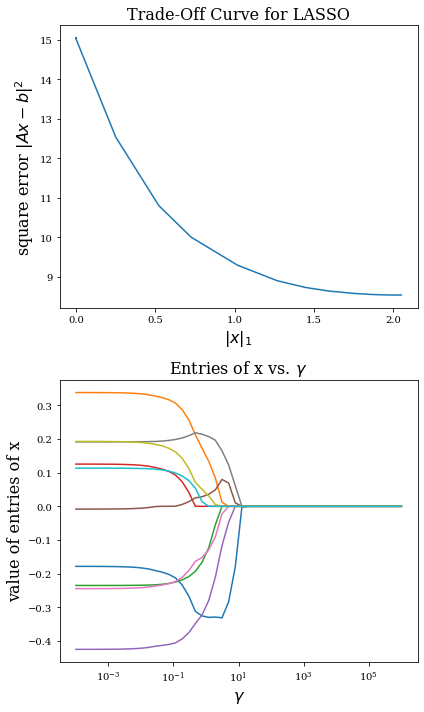

In [38]:
# source code from tutorial

filterwarnings('ignore')
# Problem data.
n = 15
m = 10
np.random.seed(1)
A = np.random.randn(n, m)
b = np.random.randn(n)
# gamma must be nonnegative due to DCP rules.
gamma = cp.Parameter(nonneg=True)

# Construct the problem.
x = cp.Variable(m)
error = cp.sum_squares(A*x - b)
obj = cp.Minimize(error + gamma*cp.norm(x, 1))
prob = cp.Problem(obj)

# Construct a trade-off curve of ||Ax-b||^2 vs. ||x||_1
sq_penalty = []
l1_penalty = []
x_values = []
gamma_vals = np.logspace(-4, 6)
print('gamma_vals[0:5]:', gamma_vals[0:5])
print('gamma_vals[-5:]:', gamma_vals[-5:])
for val in gamma_vals:
    gamma.value = val
    prob.solve()
    # Use expr.value to get the numerical value of
    # an expression in the problem.
    sq_penalty.append(error.value)
    l1_penalty.append(cp.norm(x, 1).value)
    x_values.append(x.value)
    
plt.rc('font', family='serif')
plt.figure(figsize=(6,10))

# Plot trade-off curve.
plt.subplot(211)
plt.plot(l1_penalty, sq_penalty)
plt.xlabel(r'$\|x\|_1$', fontsize=16)
plt.ylabel(r'square error $\|Ax-b\|^2$', fontsize=16)
plt.title('Trade-Off Curve for LASSO', fontsize=16)

# Plot entries of x vs. gamma.
plt.subplot(212)
for i in range(m):
    plt.plot(gamma_vals, [xi[i] for xi in x_values])
plt.xlabel(r'$\gamma$', fontsize=16)
plt.ylabel('value of entries of x', fontsize=16)
plt.xscale('log')
plt.title(r'Entries of x vs. $\gamma$', fontsize=16)

plt.tight_layout()
plt.show()    

Trade-off curves can easily be computed in parallel. The code below computes in parallel the optimal x for each γ in the LASSO problem above.

In [39]:
# from multiprocessing import Pool

# Assign a value to gamma and find the optimal x.
# def get_x(gamma_value):
#     gamma.value = gamma_value
#     result = prob.solve()
#     return x.value

# Parallel computation (set to 1 process here).
# pool = Pool(processes = 1)
# x_values = pool.map(get_x, gamma_vals)

**DPP**

In DPP, an expression is said to be **parameter-affine** if it does not involve variables and is affine in its parameters, and it is **variable-free** if it does not have variables. DPP introduces two restrictions to DCP:

1. Under DPP, all parameters are classified as affine, just like variables.

2. Under DPP, the product of two expressions is affine when at least one of the expressions is constant, or when one of the expressions is parameter-affine and the other is parameter-free.

An expression is **DPP-compliant** if it DCP-compliant subject to these two restrictions. Similar, we have `.is_dcp()` method to check this, but need to assign `dpp=True`.

In [40]:
m, n = 3, 2
x = cp.Variable((n, 1))
F = cp.Parameter((m, n))
G = cp.Parameter((m, n))
g = cp.Parameter((m, 1))
gamma = cp.Parameter(nonneg=True)

objective = cp.norm((F + G) @ x - g) + gamma * cp.norm(x)
print(objective.is_dcp(dpp=True))

True


It prints `True`. We can walk through the DPP analysis to understand why `objective` is DPP-compliant. The product `(F + G) @ x` is affine under DPP, because `F + G` is parameter-affine and `x` is variable-free. The difference `(F + G) @ x - g` is affine because the addition atom is affine and both `(F + G) @ x` and `- g` are affine. The product `gamma * cp.norm(x)` is convex because `cp.norm(x)` is convex, the product is affine because `gamma` is parameter-affine and `cp.norm(x)` is variable-free, and the expression `gamma * cp.norm(x)` is convex because the product is increasing in its second argument (since `gamma` is nonnegative).

Some are DCP-compliant but not DPP-compliant.

In [41]:
x = cp.Variable()
gamma = cp.Parameter(nonneg=True)
problem = cp.Problem(cp.Minimize(gamma * gamma * x), [x >= 1])
print("Is DPP? ", problem.is_dcp(dpp=True))
print("Is DCP? ", problem.is_dcp(dpp=False))

Is DPP?  False
Is DCP?  True


Just as it is possible to rewrite non-DCP problems in DCP-compliant ways, it is also possible to re-express non-DPP problems in DPP-compliant ways.

In [42]:
x = cp.Variable()
y = cp.Variable()
gamma = cp.Parameter(nonneg=True)
problem = cp.Problem(cp.Minimize(gamma * y), [y == gamma * x])
print("Is DPP? ", problem.is_dcp(dpp=True))
print("Is DCP? ", problem.is_dcp(dpp=False))

Is DPP?  True
Is DCP?  True


In other cases, you can represent non-DPP transformations of parameters by doing them outside of the DSL, e.g., in NumPy. For example, if `P` is a parameter and `x` is a variable, `cp.quad_form(x, P)` is not DPP. You can represent a parametric quadratic form like so:

In [43]:
n = 4
L = np.random.randn(n, n)
P = L.T @ L
P_sqrt = cp.Parameter((n, n))
x = cp.Variable((n, 1))
quad_form = cp.sum_squares(P_sqrt @ x)
P_sqrt.value = sp.linalg.sqrtm(P)
assert quad_form.is_dcp(dpp=True)

As another example, the quotient `expr / p` is not DPP-compliant when `p` is a parameter, but this can be rewritten as `expr * p_tilde`, where `p_tilde` is a parameter that represents `1/p`.

### 2. Check curvature of variables, constraints and objective

![jupyter](./curvature.jpg)

In [44]:
print('curvature of x,y: ',x.curvature,y.curvature)
print('curvature of -(x-20)**2: ',(-1*cp.square(x-20)).curvature)
print('curvature of -2*(y-1)**2: ',(-2*cp.square(y-1)).curvature)

curvature of x,y:  AFFINE AFFINE
curvature of -(x-20)**2:  CONCAVE
curvature of -2*(y-1)**2:  CONCAVE


In [45]:
print('sign of x,y: ',x.sign,y.sign)
print('sign of -(x-20)**2: ',(-1*cp.square(x-20)).sign)
print('sign of -2*(y-1)**2: ',(-2*cp.square(y-1)).sign)

sign of x,y:  UNKNOWN UNKNOWN
sign of -(x-20)**2:  NONPOSITIVE
sign of -2*(y-1)**2:  NONPOSITIVE


### 3. Atoms

**Infix Operators**

In [46]:
# +, -, *, /, @

**Transpose**

In [47]:
# ().T

**Power**

In [48]:
# power(x,p)

**Scalar Atomic Functions**

In [49]:
x = cp.Variable(5)
X = cp.Variable((5,4))
# cp.geo_mean(x)
# cp.geo_mean(x,(1,2,3,4,5))
# cp.harmonic_mean(x)
# cp.lambda_max(X)  # largest eigenvalues
# cp.lambda_min(X)  # minimum eigenvalues
# cp.lambda_sum_largest(X,k) # sum of k largest eigenvalues of x
# cp.lambda_sum_smallest(X,k)
# cp.log_det(X)
# cp.log_sum_exp(X)
# cp.matrix_frac(x,P)  # x^T @ P^{-1} @ x
# cp.max(X)
# cp.min(X)
# cp.mixed_norm(X,p,q)
# cp.norm(x)
# cp.norm(x,1)
# cp.norm(x,2)
# cp.norm(x,'inf')
# cp.norm(X)
# cp.norm(X,1)
# cp.norm(X,2)
# cp.norm(X,'fro')
# cp.norm(X,'inf')
# cp.norm(X,'nuc')
# cp.pnorm(X,p)  p >= 1 or p = 'inf'
# cp.pnorm(X,p)  p < 1 but p not equal to 0
# cp.quad_form(x,P)  # P \in S_{+}^{n}
# cp.quad_form(x,P)  # P \in S_{-}^{n}
# cp.quad_form(c,X)
# cp.quad_over_lin(X,y)
# cp.sum(X)
# cp.sum(X,axis=0, keepdims=True)  # has size (1,4)
# cp.sum(X, axis=0)  # has size (4,)
# cp.sum(X,axis=1)  # has size (5,)
# cp.sum_largest(X,k)
# cp.sum_smallest(X,k)
# cp.sum_squares(X)
# cp.trace(X)
# cp.tv(x)
# cp.tv(X)
# cp.tv([X1,X2,...,Xk])

**Elementwise Atomic Functions**

In [50]:
# cp.abs(x)
# cp.entr(x)
# cp.exp(x)
# cp.huber(x,M=1)  # M >= 0
# cp.inv_pos(x)
# cp.kl_div(x,y)
# cp.log(x)
# cp.log1p(x)
# cp.logistic(x)
# cp.maximum(x,y)
# cp.minimum(x,y)
# cp.multiply(c,x)
# cp.neg(x)
# cp.pos(x)
# cp.power(x,0)
# cp.power(x,1)
# cp.power(x,p)
# cp.scalene(x,alpha,beta)   # alpha pos(x) + beta neg(x)  alpha >= 0  beta >= 0
# cp.sqrt(x)
# cp.square(x)

### 4. Disciplined Geometric Programming

> "While DCP is a ruleset for constructing convex programs, DGP is a ruleset for log-log convex programs (LLCPs), which are problems that are convex after the variables, objective functions, and constraint functions are replaced with their logs, an operation that we refer to as a log-log transformation. Every geometric program (GP) and generalized geometric program (GGP) is an LLCP, but there are LLCPs that are neither GPs nor GGPs." 
$\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad$ 
$\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad$—— CVXPY Tutorial

In [51]:
# source code from CVXPY tutorial
# DGP requires Variables to be declared positive via `pos=True`.
x = cp.Variable(pos=True)
y = cp.Variable(pos=True)
z = cp.Variable(pos=True)

objective_fn = x * y * z
constraints = [4 * x * y * z + 2 * x * z <= 10, 
                   x <= 2*y, 
                   y <= 2*x, 
                   z >= 1]

problem = cp.Problem(cp.Maximize(objective_fn), constraints)
try:
    problem.solve(gp=True) # To solve DGP, must assign gp value to the solve method
except Exception as e:
    print(e)

print("Optimal value: ", problem.value)
print("      x      : ", x.value)
print("      y      : ", y.value)
print("      z      : ", z.value)

Optimal value:  2.000000010082854
      x      :  1.0000000133712281
      y      :  1.9999999833403979
      z      :  1.0


![jupyter](./log-log_curvature.jpg)

In [52]:
# source code obtained from CVXPY tutorial
# log-log curvature is stored in .log_log_curvature attribute
x = cp.Variable(pos=True)
y = cp.Variable(pos=True)

constant = cp.Constant(2.0)
monomial = constant * x * y
posynomial = monomial + (x ** 1.5) * (y ** -1)
reciprocal = posynomial ** -1
unknown = reciprocal + posynomial

print(constant.log_log_curvature)
print(monomial.log_log_curvature)
print(posynomial.log_log_curvature)
print(reciprocal.log_log_curvature)
print(unknown.log_log_curvature)

LOG-LOG CONSTANT
LOG-LOG AFFINE
LOG-LOG CONVEX
LOG-LOG CONCAVE
UNKNOWN


In [53]:
print(constant.is_log_log_constant())
print(monomial.is_log_log_affine())
print(posynomial.is_log_log_convex())
print(reciprocal.is_log_log_concave())
# print(unknown.is_log_log_unknown())
# AttributeError: 'AddExpression' object has no attribute 'is_log_log_unknown'

True
True
True
True


Again, we have method `.is_dgp()` similar to `.is_dcp()`.

In [54]:
# source code obtained from CVXPY tutorial
# please refer to the tutorial for log-log curvature rules of f(expr1,expr2,expr3,...), which is quite intuitive

x = cp.Variable(pos=True)
y = cp.Variable(pos=True)

monomial = 2.0 * constant * x * y
posynomial = monomial + (x ** 1.5) * (y ** -1)

assert monomial.is_dgp()
assert posynomial.is_dgp()

print(monomial.is_dgp())
print(posynomial.is_dgp())

True
True


Similar atoms to DCP.

In [55]:
# scalar functions 

# geo_mean(x)
# geo_mean(x,p)
# harmonic_mean(x)
# max(X)
# min(X)
# norm(x)
# norm(x,2)
# norm(X,1)
# norm(X,2)
# norm(X,'inf')
# norm(X,'fro')
# pnorm(X,p)
# prod(X)
# quad_form(x,p)
# quad_over_lin(X,y)
# sum(X)
# sum_squares(X)
# trace(X)
# pf_eigenvalue(X)

In [56]:
# elementwise functions

# diff_pos(x,y)
# entr(x)
# exp(x)
# log(x)
# maximum(x,y)
# minimum(x,y)
# multiply(x,y)
# one_minus_pos(x)  # 1-x for x in (0,1)
# power(x,0)
# power(x,1)
# sqrt(x)
# square(x)

In [57]:
# vector/matrix functions

# bmat([[X_11,...,X_1q],...,[Xp1,...,Xpq]])
# diag(x)
# diag(X)
# eye_minus_inv(X)
# gmatmul(A,x)
# hstack([X1,...,Xk])
# matmul(X,Y)
# resolvent(X)
# reshape(X,(m',n'))
# vec(X)
# vstack([X1,...,Xk])

### 5. Disciplined Quaiconvex Problem

>  "Disciplined quasiconvex programming (DQCP) is a generalization of DCP for quasiconvex functions.Quasiconvexity generalizes convexity: a function $f$ is quasiconvex if and only if its domain is a convex set and its sublevel sets $\lbrace x:f(x) \leq t \rbrace$ are convex, for all $t$."
$\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad$ 
$\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad$—— CVXPY Tutorial

Compared to DCP, now the rulesets of DQCP aims to minimize a quasiconvex objective over a convex set, and allows forms of $f(x)\leq t$ where $f(x)$ is quasiconvex while $t$ is constant, and of $f(x) \geq t$ where $f(x)$ is quasiconcave while $t$ is constant.

In [58]:
# source code from tutorial

x = cp.Variable()
y = cp.Variable(pos=True)

objective_fn = -cp.sqrt(x) / y

problem = cp.Problem(cp.Minimize(objective_fn), [cp.exp(x) <= y])
problem.solve(qcp=True)  # similarly, must assign True to qcp to solve DQCP

assert problem.is_dqcp()

print("Optimal value: ", problem.value)
print("      x      : ", x.value)
print("      y      : ", y.value)

Optimal value:  -0.4288821220397949
      x      :  0.4998944205766888
      y      :  1.6485477840919485


**Curvature**

In [59]:
# source code from tutorial
x = cp.Variable(3)
y = cp.length(x)
z = -y
print(y.curvature)
print(z.curvature)

w = cp.ceil(x)  # elementwise ceiling
print(w.curvature)

QUASICONVEX
QUASICONCAVE
QUASILINEAR


In [60]:
print(w.is_quasiconvex())
print(w.is_quasiconcave())
print(w.is_quasilinear())  # if both w.is_quasiconvex() and w.is_quasiconcave() are True

True
True
True


**Composition Rule**

![jupyter](./DQCP_composition_rule.jpg)

In [61]:
# source code from tutorial

x = cp.Variable(pos=True)
y = cp.Variable(pos=True)

product = cp.multiply(x, y)

assert product.is_quasiconcave()
assert product.is_dqcp()

In [62]:
print("  Constant  :",product.is_constant())
print("   Affine   :",product.is_affine())
print("  Concave   :",product.is_concave())
print("   Convex   :",product.is_convex())
print("Quasiconcave:",product.is_quasiconcave())
print("Quasiconvex :",product.is_quasiconvex())
print("Quasilinear :",product.is_quasilinear())

  Constant  : False
   Affine   : False
  Concave   : False
   Convex   : False
Quasiconcave: True
Quasiconvex : False
Quasilinear : False


**DQCP rules**

Valid Objectives:
- Minimize (quasiconvex)
- Maximize (quasiconcave)

Valid Constraints:
- affine == affine
- convex <= concave
- concave >= convex
- quasiconvex <= constant
- quasiconcave >= constant

|    Valied Objectives       |   Valid Constraints     |
|:------------------------------:|:--------------------------:|
|<br>Minimize (quasiconvex)<br><br>Maximize (quasiconcave)|affine == affine<br>convex <= concave<br>concave >= convex<br>quasiconvex <= constant<br>quasiconcave >= constant|

In [63]:
# source code from tutorial 

# The sign of variables affects curvature analysis.
x = cp.Variable(nonneg=True)

concave_fractional_fn = x * cp.sqrt(x)
constraint = [cp.ceil(x) <= 10]

problem = cp.Problem(cp.Maximize(concave_fractional_fn), constraint)

assert concave_fractional_fn.is_quasiconcave()
assert constraint[0].is_dqcp()  # must do slicing otherwise list object has no method of .is_dqcp()
assert problem.is_dqcp()

w = cp.Variable()
fn = w * cp.sqrt(w)

problem = cp.Problem(cp.Maximize(fn))

assert not fn.is_dqcp()
assert not problem.is_dqcp()

**Atoms**

In [64]:
# Ratio:
#    x/y

# Scalar product:
#    *

# Distance ratio function:
#   cp.dist_ratio(x,a,b)
#   || x-a ||_2 / || x-b ||_2, implicitly enforing the constraint: || x-a ||_2 <= || x-b ||_2

# Maximum generalized eigenvalue:
#   cp.gen_lambda_max(A,B)
#   Ax = λBx

# Ceiling and floor:
#   cp.ceil(x) and cp.floor(x)   
#   quasilinear and increasing

# Sign:
#   cp.sign(x)
#   -1 for x<=0 and +1 for x>0

# Length of a vector:
#   cp.length(x)

**Solve DQCP**

The solve method will solves a DQCP by bisection and it will automatically find a lower bound and an upper bound for bisection, if both are not provided. You can also specify the options: `problem.solve(qcp=True, low=12, high=17)`. We can also choose a different solver: `problem.solve(qcp=True, solver=cp.SCS)`; check the verbose output describing the bisection process: `problem.solve(qcp=True, verbose=True)`. 

### 6. Advanced Features

**Dual Variables (Lagrangian Multiplier)**

In [65]:
# Create two scalar optimization variables.
x = cp.Variable()
y = cp.Variable()

# Create two constraints.
constraints = [x + y == 1,
               x - y >= 1]

# Form objective.
obj = cp.Minimize((x - y)**2)

# Form and solve problem.
prob = cp.Problem(obj, constraints)
prob.solve()

# The optimal dual variable (Lagrange multiplier) for
# a constraint is stored in constraint.dual_value.
print("optimal (x + y == 1) dual variable", constraints[0].dual_value)
print("optimal (x - y >= 1) dual variable", constraints[1].dual_value)
print("x - y value:", (x - y).value)

optimal (x + y == 1) dual variable 0.0
optimal (x - y >= 1) dual variable 2.0
x - y value: 1.0


With the value of multiplier/dual variable, we can back out whether inequality constraints are binding by complementarity slackness condition.

**Attributes**

In [66]:
# Leaf(shape=None, name=None, value=None, nonneg=False, nonpos=False, 
#      symmetric=False, diag=False, PSD=False, NSD=False, boolean=False, integer=False)

# Leaf is the parent class of Variable and Parameters

In [68]:
p = cp.Parameter(nonneg=True)
try:
    p.value = -1
except Exception as e:
    print(e)

print("Projection:", p.project(-1))

Parameter value must be nonnegative.
Projection: 0.0


A sensible idiom for assigning values to leaves is **`leaf.value = leaf.project(val)`**, ensuring that the assigned value satisfies the leaf’s properties. A slightly more efficient variant is **`leaf.project_and_assign(val)`**, which projects and assigns the value directly, without additionally checking that the value satisfies the leaf’s properties. In most cases `project` and checking that a value satisfies a leaf’s properties are cheap operations (i.e., `O(n)`), but for symmetric positive semidefinite or negative semidefinite leaves, the operations compute an eigenvalue decomposition.

**Semidefinite Matrices**

In [69]:
# Creates a 100 by 100 positive semidefinite variable.
X = cp.Variable((100, 100), PSD=True)

# You can use X anywhere you would use a normal CVXPY variable.
obj = cp.Minimize(cp.norm(X) + cp.sum(X))

Set constraints on matrices in terms of PSD,NSD,PD,ND, and symmetric.

```python
# expr1 must be positive semidefinite.
constr1 = (expr1 >> 0)

# expr2 must be negative semidefinite.
constr2 = (expr2 << 0)

# expr must be symmetric.
constr = (expr == expr.T)
```

You can also use `Variable((n, n), symmetric=True)` to create an n by n variable constrained to be symmetric. The difference between specifying that a variable is symmetric via attributes and adding the constraint `X == X.T` is that attributes are parsed for DCP information and a symmetric variable is defined over the (lower dimensional) vector space of symmetric matrices.

**Mixed-integer Problem**

As long as specify the corresponding attributes for variables.

```python
# Creates a 10-vector constrained to have boolean valued entries.
x = cp.Variable(10, boolean=True)

# expr1 must be boolean valued.
constr1 = (expr1 == x)

# Creates a 5 by 7 matrix constrained to have integer valued entries.
Z = cp.Variable((5, 7), integer=True)

# expr2 must be integer valued.
constr2 = (expr2 == Z)
```

CVXPY provides interfaces to many mixed-integer solver, but not install them by default: `GLPK_MI`,`CBC`,`SCIP`.CVXOPT provides CVXPY with access to `GLPK_MI`. If you need to solve **large** or **nonlinear** mixed-integer problems, you can use commercial solvers like `CPLEX`,`GUROBI`,`MOSEK`,`NAG`. Some of them require licences and you can acquire an academic one.

**Complex Values**

In [72]:
# A complex valued variable.
x = cp.Variable(complex=True)
# A purely imaginary parameter.
p = cp.Parameter(imag=True)

print("p.is_imag() = ", p.is_imag())
print("(x + 2).is_real() = ", (x + 2).is_real())

# is_real(), is_imag(), is_complex()

p.is_imag() =  True
(x + 2).is_real() =  False


The top-level expressions in the problem objective must be real valued, but subexpressions may be complex. Arithmetic and all linear atoms are defined for complex expressions. The nonlinear atoms abs and all norms except `norm(X, p)` for `p < 1` are also defined for complex expressions. All atoms whose domain is symmetric matrices are defined for Hermitian matrices. Similarly, the atoms `quad_form(x, P)` and `matrix_frac(x, P)` are defined for complex `x` and Hermitian `P`. All constraints are defined for complex expressions.

The following additional atoms are provided for working with complex expressions:

1. `real(expr)` gives the real part of expr.

2. `imag(expr)` gives the imaginary part of expr (i.e., expr = real(expr) + 1j*imag(expr)).

3. `conj(expr)` gives the complex conjugate of expr.

4. `expr.H` gives the Hermitian (conjugate) transpose of expr.

**Transforms**

In [74]:
# x = cp.Variable()
# constraints = [0 <= x, x <= 1]
# expr = cp.indicator(constraints)
# x.value = .5
# print("expr.value = ", expr.value)
# x.value = 2
# print("expr.value = ", expr.value)

# return 0 if constraint holds and \infty else
# please refer to: https://www.cvxpy.org/api_reference/cvxpy.transforms.html#transforms-api

# AttributeError: module 'cvxpy' has no attribute 'indicator'

**Problem Arithmics**

```python
# Addition and subtraction.
    Minimize(expr1) + Minimize(expr2) == Minimize(expr1 + expr2)
    Maximize(expr1) + Maximize(expr2) == Maximize(expr1 + expr2)
    Minimize(expr1) + Maximize(expr2) # Not allowed.
    Minimize(expr1) - Maximize(expr2) == Minimize(expr1 - expr2)

# Multiplication (alpha is a positive scalar).
     alpha*Minimize(expr) == Minimize(alpha*expr)
     alpha*Maximize(expr) == Maximize(alpha*expr)
    -alpha*Minimize(expr) == Maximize(-alpha*expr)
    -alpha*Maximize(expr) == Minimize(-alpha*expr)
```

```python
# Addition and subtraction.
    prob1 + prob2 == Problem(prob1.objective + prob2.objective,
                             prob1.constraints + prob2.constraints)
    prob1 - prob2 == Problem(prob1.objective - prob2.objective,
                             prob1.constraints + prob2.constraints)

# Multiplication (alpha is any scalar).
    alpha*prob == Problem(alpha*prob.objective, prob.constraints)
```

**Solver Method Options**

In [ ]:
# solve(solver=None, verbose=False, gp=False, qcp=False, requries_grad=False, enforce_dpp=False, **kwargs)

# specific options for specific solvers please refer to:
#     https://www.cvxpy.org/tutorial/advanced/index.html#setting-solver-options    

**Warm Start**

When solving the same problem for multiple values of a parameter, many solvers can exploit work from previous solves (i.e., warm start). For example, the solver might use the previous solution as an initial point or reuse cached matrix factorizations. Warm start is enabled by default and controlled with the `warm_start` solver option. The code below shows how warm start can accelerate solving a sequence of related least-squares problems.

In [76]:
# Problem data.
m = 200
n = 100
np.random.seed(1)
A = np.random.randn(m, n)
b = cp.Parameter(m)

# Construct the problem.
x = cp.Variable(n)
prob = cp.Problem(cp.Minimize(cp.sum_squares(A @ x - b)),
                   [x >= 0])

b.value = np.random.randn(m)
prob.solve()
print("First solve time:", prob.solver_stats.solve_time)

b.value = np.random.randn(m)
prob.solve(warm_start=True)
print("Second solve time:", prob.solver_stats.solve_time)

First solve time: 0.0202403
Second solve time: 0.0101341


**Get Standard Form**

If you are interested in getting the standard form that CVXPY produces for a problem, you can use the `get_problem_data` method. When a problem is solved, a **SolvingChain** passes a low-level representation that is compatible with the targeted solver to a solver, which solves the problem. This method returns that low-level representation, along with a `SolvingChain` and metadata for unpacking a solution into the problem. This low-level representation closely resembles, but is not identitical to, the arguments supplied to the solver.

A solution to the equivalent low-level problem can be obtained via the data by invoking the `solve_via_data` method of the returned solving chain, a thin wrapper around the code external to CVXPY that further processes and solves the problem. Invoke the `unpack_results` method to recover a solution to the original problem.

```python
problem = cp.Problem(objective, constraints)
data, chain, inverse_data = problem.get_problem_data(cp.SCS)
# calls SCS using `data`
soln = chain.solve_via_data(problem, data)
# unpacks the solution returned by SCS into `problem`
problem.unpack_results(soln, chain, inverse_data)
```

Alternatively, the `data` dictionary returned by this method contains enough information to bypass CVXPY and call the solver directly.

```python
problem = cp.Problem(objective, constraints)
probdata, _, _ = problem.get_problem_data(cp.SCS)

import scs
data = {
  'A': probdata['A'],
  'b': probdata['b'],
  'c': probdata['c'],
}
cone_dims = probdata['dims']
cones = {
    "f": cone_dims.zero,
    "l": cone_dims.nonpos,
    "q": cone_dims.soc,
    "ep": cone_dims.exp,
    "s": cone_dims.psd,
}
soln = scs.solve(data, cones)
```

The structure of the data dict that CVXPY returns depends on the solver. For details, print the dictionary, or consult the solver interfaces in `cvxpy/reductions/solvers`.

**Reductions**

CVXPY uses a system of **reductions** to rewrite problems from the form provided by the user into the standard form that a solver will accept. A reduction is a transformation from one problem to an equivalent problem. Two problems are equivalent if a solution of one can be converted efficiently to a solution of the other. Reductions take a CVXPY Problem as input and output a CVXPY Problem. The full set of reductions available is discussed in [Reductions](https://www.cvxpy.org/api_reference/cvxpy.reductions.html#reductions-api).